<a href="https://colab.research.google.com/github/sdaitzman/DSA2020/blob/master/Midterm_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSA Practice Programming Lab
The goal of this lab is to review the concepts seen in class so far, and to use some of the tools not already implemented for homework. This will be a good starting point to prepare for the midterm exam so make notes of any questions/areas that you find more difficult. 

The first few questions were taken from Cracking the Coding Interview, 6th edition.

## Question 1: 
Given a short string $s1$ and a long string $s2$, write a function that counts how many permutations of $s1$ are found in $s2$. Also, give the runtime analysis (should be O($n1*n2$) where $n1$ is the length of $s1$ and $n2$ is the length of $s2$). This is roughly linear in $n2$ if $n1$ is small. 

Example: Your function should return three permutations for $s1$ = 'ab', $s2$ = 'baba' (starting at indices 0, 1, 2) and one permutation for $s1$ = 'cake' and $s2$ = 'cacke' (starting at index 1).

In [0]:
def permutations(s1, s2):
  '''
  Counts permutations of string s1 in string s2
  '''
  count = 0 # the counter
  d1 = {}   # dict of string 1
  d2 = {}   # dict of string 2

  # Build initial counter dicts from s1 and s2
  for i in range(len(s1)):
    if s1[i] in d1.keys(): # build dict 1
      d1[s1[i]] += 1
    else:
      d1[s1[i]] = 1
    if s2[i] in d2.keys(): # build dict 2
      d2[s2[i]] += 1
    else: 
      d2[s2[i]] = 1
  
  for i in range(len(s2) - len(s1)):
    # iterate through s2
    # skip the part we already have in d2
    
    # the subset of s2 is a permutation!
    if d1 == d2: count += 1

    # shrink or remove the d2 key we're stripping
    if d2[s2[i]] == 1:
      del d2[s2[i]]
    else:
      d2[s2[i]] -= 1

    # grow or create the d2 key to include the new char
    pos = i+len(s1)
    if s2[pos] in d2.keys():
      d2[s2[pos]] += 1
    else: 
      d2[s2[pos]] = 1

  # check if the last subset of s2 is a permutation!
  if d1 == d2: count += 1
  return count

s1 = 'ab'
s2 = 'bababa'
print(permutations(s1, s2), " for ", s1, " and ", s2)

s1 = 'cake'
s2 = 'cacke'
print(permutations(s1, s2), " for ", s1, " and ", s2)

s1 = 'cake'
s2 = 'cakecake'
print(permutations(s1, s2), " for ", s1, " and ", s2)

s1 = 'egg'
s2 = 'eggegg'
print(permutations(s1, s2), " for ", s1, " and ", s2)

5  for  ab  and  bababa
1  for  cake  and  cacke
5  for  cake  and  cakecake
4  for  egg  and  eggegg


## Question 2: 
 Given two strings, write a function to check if they are one edit (or zero edits) away. For the purposes of this question, a single edit refers to either inserting a character, deleting a character, or replacing a character.

Example: Your function should return True for "lake" and "bake" (one edit) but False for "lake" and "ace" (two edits).

In [0]:
def strcmp(s1, s2):
  ret = None
  L1 = len(s1)
  L2 = len(s2)

  # case 1: length difference >1
  if abs(L1 - L2) > 1: return False
  
  # case 2: strings equal
  if s1 == s2: return True

  # case 3: length equal
  if L1 == L2:
    count = 0
    
    for i in range(L1):
      if s1[i] != s2[i]:
        count += 1
        if count > 1: return False

  return True

  # case 4: length different == 1
  count = 0
  short = s1 if len(s1)<len(s2) else s2
  long  = s2 if len(s1)<len(s2) else s1

  if short[0] == long[0]:
      for i in range(L1):
          if s1[i] != s2[i]:
                count += 1
          if count > 1: return False
  if short[0] == long[1]:
      for i in range(len(L1)-1):
          if s1[i] != s2[i+1]:
              count += 1
          if count > 1: return False

  return True

s1 = 'kale'
s2 = 'skale'
strcmp(s1, s2)

True


## Question 3: 
Write a function that takes in two lists $l1$ and $l2$ and returns whether $l2$ is a rotation of $l1$ in $O(n1+n2)$ time, where $n1$ is the length of $l1$ and $n2$ is the length of $l2$. 

Example: Your function should return True for $11 = [h,e,l,l,o]$, $l2 = [e,l,l,o,h]$.

> This one is wacky and Nick says he's asking Alice and will update someone on our team with the answer. He thought that working for most common strings would be a reasonable approach. The runtime requirement is no longer needed.

In [0]:
def rotated(s1, s2):

  if len(s1) != len(s2): return False

  indices = [i for i, x in enumerate(s2) if x == s1[0]]
  for i in indices:
    for j in range(len(s1)):
      pos = i + j if i+j<len(s1) else i+j-len(s1)
      if s1[j] != s2[pos]: return False

  return True

s1 = list('hello')
s2 = list('elloh')
rotated(s1, s2)

s1 = list('world')
s2 = list('dworl')
rotated(s1, s2)

s1 = list('aaaaaaaaaaaaaaaaaaaa')
s2 = list('aaaaaaaaaaaaaaaaaaaa')
rotated(s1, s2)

s1 = list('aaaaaaaaaaaaaaaaaaaawws')
s2 = list('aaaaaaaaaaaaaaaaaaaawww')
rotated(s1, s2)

False


## Question 4: 
Given a list $l$ that is a rotation of a sorted list, write a function that returns the index with the minimum element in O($log n$), where $n$ is the length of $l$.

Example: Your function should return 3 for $l = [4.5, 6, 8.2, 0, 1.3, 1.4]$.

> Binary search

In [0]:
def minRotation(l, start=0):
  # if we're in the base case, time to return with a list comprehension
  # finds the index of the minimum element in the remaining 3 items
  # this is O(1) because the length of the list is now 4
  if len(l) <= 4:
    return [i for i in range(len(l)) if l[i] == min(l)][0]

  i2 = int(len(l)/2)

  el1 = l[0]
  el2 = l[i2]
  el3 = l[-1]

  # case 1: break in left half
  if el2 < el1: return minRotation(l[0:i2+1], start)

  # case 2: break in right half
  if el3 < el2: return minRotation(l[i2:-1], start + i2)

  # case 3: rotation is 0
  if el1 < el2 <= el3 or el1 <= el2 < el3: return 0

  # case 4 (edge case): split points are equal
  if el1 == el2 == el3:
    first_half_mindex = minRotation(l[0:i2+1], start)
    next_half_mindex = minRotation(l[i2:-1], i2 + start)

    return first_half_mindex + start if l[first_half_mindex] < l[next_half_mindex] \
    else next_half_mindex + start

  return None

l = [4.5,6,8.2,0,1.3,1.4]
print(l, ': ', minRotation(l))

l = [4,5,6,-3,0,1]
print(l, ': ', minRotation(l))

l = [4,5,6,7,8]
print(l, ': ', minRotation(l))

l = [4,4,0,1,4,4,4,4,4]
print(l, ': ', minRotation(l))

l = [4,4,4,4,4,4,4,4,4,4,4,0,1,4,4,4,4,4]
print(l, ': ', minRotation(l))

[4.5, 6, 8.2, 0, 1.3, 1.4] :  3
[4, 5, 6, -3, 0, 1] :  3
[4, 5, 6, 7, 8] :  0
[4, 4, 0, 1, 4, 4, 4, 4, 4] :  2
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 4, 4, 4, 4, 4] :  11


## Question 5: 
Implement Merge Sort using the doubly linked list class you implemented for homework 2. Your algorithm should not have to copy any nodes when recursing (but may have to update O(1) pointer values). 

> Merge sort with a DLL

In [0]:
class Node:
    ''' Node object which stores a value and pointers to adjacent elements '''
    def __init__(self, val=None, next_node=None, prev_node=None):
        ''' Constructor for a node '''
        self.val = val
        self.next = next_node
        self.prev = prev_node

class DLL:
    def __init__(self, vals=None):
        ''' Constructor for an empty list '''
        self.first = None
        self.last = None
        self.node_number = 0

        if vals is not None:
            for i in range(len(vals)):
                self.push(vals[i])

    def length(self, nxt=None):
        ''' Returns the number of nodes in the list '''
        # TODO: work with empty DLL
        next_node = nxt or self.first.next
        nodes = 1
        while next_node:
            next_node = next_node.next
            nodes += 1
        return nodes

    def push(self, val):
        ''' Adds a node with value equal to val to the front of the list '''
        # declare a new node, linked to the last
        new_node = Node(val=val, next_node=self.first)
        self.push_node(new_node)
        self.node_number += 1

    def push_node(self, new_node):
        ''' Adds a node with value equal to val to the front of the list '''
        new_node.next = self.first
        new_node.prev = None
        if self.first:
            self.first.prev = new_node
        else:
            self.last = new_node
        self.first = new_node
        self.first.prev = None

        self.node_number += 1


    def insert_after(self, prev_node, val):
        ''' Adds a node with value equal to val in the list after prev_node '''
        new_node = Node(val=val, prev_node=prev_node)

        if prev_node is self.last:
            print("We're at the last node, y'all!")
            self.last = new_node
            new_node.next = None # probably redundant, this kwarg is set by default to None
        else:
            new_node.next = prev_node.next
            prev_node.next.prev = new_node
        prev_node.next = new_node
        self.node_number += 1


    def delete(self, node):
        ''' Removes node from the list '''
        if node is not self.last:
            node.next.prev = node.prev
        else:
            self.last = node.prev
            node.prev.next = None

        if node is not self.first:
            node.prev.next = node.next
        else:
            self.first = node.next
            node.next.prev = None
        self.node_number -= 1


    def index(self, i):
        ''' Returns the node at position i (i<n)
            Returns None for empty list
            Returns a None node for out-of-bounds index '''
        next_node = self.first
        current = 0

        # for each node in the chain
        while next_node:
            # if it's the one we want, return it
            if current == i:
                return next_node
            # if it's not yet, keep going
            elif next_node.next:
                current += 1
                next_node = next_node.next
            # if we're at the end, return an unlinked node
            else:
                return Node(val=None, next_node=None, prev_node=None)

    def merge(self, A, B):
        ''' Merges two DLL into a single DLL, maintaining sortedness. '''
        C = DLL()  # Define DLL for output (still in place as no nodes are created)

        # Iterate backwards through the lists and add greatest value to list each time
        head_a = A.last
        head_b = B.last
        while True:
            if head_a is None:
                # If A is empty
                head = head_b
                while head.prev is not None:
                    # Add everything left in B to C
                    prev_val = head.prev
                    C.push_node(head)
                    head = prev_val
                C.push_node(head)
                break
            elif head_b is None:
                # If B is empty
                head = head_a
                while head.prev is not None:
                    # Add everything left in A to C
                    prev_val = head.prev
                    C.push_node(head)
                    head = prev_val
                C.push_node(head)
                break

            # Add greater value to C
            elif head_b.val > head_a.val:
                prev_val = head_b.prev
                C.push_node(head_b)
                head_b = prev_val
            else:
                prev_val = head_a.prev
                C.push_node(head_a)
                head_a = prev_val

        return C

    def sort(self):
        ''' Sorts the contents of the DLL using mergesort '''
        # in base case, return self
        if self.length() == 1: return self
        # Split the dll in half
        a, b = self.half()
        # merge the halves back after they have been sorted
        return self.merge(a.sort(), b.sort())

    def half(self):
        ''' Splits a dll in two and returns the result '''
        A = DLL() # Still in place as no new nodes are created
        B = DLL()
        head = self.first
        for _ in range(self.length()//2):
            # Push half the elements to A
            next_val = head.next
            A.push_node(head)
            head = next_val
        while head.next is not None:
            # Push the rest to B
            next_val = head.next
            B.push_node(head)
            head = next_val
        B.push_node(head)

        return (A, B)

    def __repr__(self):
        ''' Print a list representation of the dll '''
        print_list = []
        current = self.first
        for _ in range(self.node_number):
            if current is not None:
                print_list.append(current.val)
                current = current.next
        return str(print_list)


dll = DLL([99.4, 12, -2, 33, 14.7])
print(dll)
print(dll.sort(), '\n')


dll2 = DLL([99.4, 12, -2, 33, 14.7])
print(dll2)
print(dll2.sort())


[14.7, 33, -2, 12, 99.4]
[-2, 12, 14.7, 33, 99.4] 

[14.7, 33, -2, 12, 99.4]
[-2, 12, 14.7, 33, 99.4]


# Challenges 
Pick at least one of the following challenges. I recommend the first one if you'd like to practice divide-and-conquer algorithms.

## Challenge 1 - Skyline Problem
Given a list of buildings including their positions and heights, find the skyline visible using a divide-and-conquer approach. See image below for a skyline example. First, you should think about how you will represent a building and how you will represent the outputted skyline. You may assume all buildings are rectangular (what a boring city). 

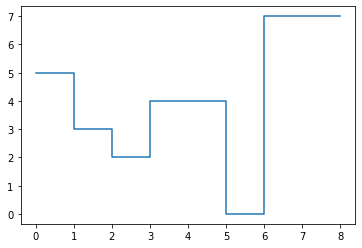

In [0]:
import matplotlib.pyplot as plt

class Building:
    def __init__(self, x, width, height):
        self.pos = x
        self.width = width
        self.height = height

def skyline(buildings):
    heights = [(b.pos + x, b.height) for b in buildings for x in range(b.width)]
    res = find(heights)
    max_pos = res[-1][0]
    d = dict(res)
    return [d[i] if i in d else 0 for i in range(max_pos + 1)]

def find(heights):
    # base case: single building so we know the height
    if len(heights) == 1: return heights

    # split the buildings in half with a saw
    center = len(heights) // 2
    A = find(heights[:center])
    B = find(heights[center:])

    # merge the discrete skylines
    return merge(A, B)

def merge(A, B):
    res = []

    while(True):
        if not len(A):
            res.extend(B)
            break
        elif not len(B):
            res.extend(A)
            break

        if A[0][0] == B[0][0]:
            height = max(A[0][1], B[0][1])
            res.append((A[0][0], height))
            A.pop(0)
            B.pop(0)
        else:
            m = A if A[0][0] < B[0][0] else B
            res.append(m.pop(0))
    
    return res

ans = skyline([Building(2, 2, 2), Building(0, 3, 2), Building(0, 2, 5), Building(1, 2, 3), Building(4, 2, 4), Building(7, 2, 7)])
plt.step([i for i in range(len(ans))], ans);

## Challenge 2 - Minesweeper
Design an object class to represent the game of minesweeper. Think about how the way you represent the game will impact the runtime of updating the grid. You may also want to allow the user to start a game with different difficulty levels. 

If you want to add some funk, think about how you can change the structure or elements of the game (maybe the landscape isn't a grid? are there fun surprises to uncover?)

In [0]:
##
## THIS IS NOT COMPLETE
##

class Minesweeper:
    """ Defines a Minesweeper game object. """

    class Square:
        def __init__(self, pos):
            """
            Initializes a square object. Each square is responsible for
            knowing whether or not it is a mine, and how many mines are in its
            proximity.
            """
            self.x, self.y = pos
            self.hidden = True
            self.mine = False
            self.prox = 0

        def render(self):
            # Code to render the game using whatever UI library would go here
            # In Java that might be LWJGL, but in Python it is likely pygame
            pass

    def __init__(self, shape=(30, 16)):
        """
        Initializes the Minesweeper game. Note that the field is not
        populated with mines until the user makes the first move, as the first
        click is never allowed to be a mine.
        """
        self.width, self.height = shape
        self.array = [Square() for _ in range(self.width * self.height)]
        self.init = False
        self.gameOver = False

    def click(self, x, y):
        """
        Updates the game when the user clicks a square. If this is the first
        click of the game, then the board is populated with mines first.
        """
        if not self.init:
            # populate the board
            pass

        # get the square that has been clicked
        clicked = self.array[(y * self.width) + x]

        # If we've exploded a mine then it's game over
        if clicked.mine:
            self.gameOver = True
            return
        
        clicked.hidden = False

    def render(self):
        """ Render the board onto the current display. """
        for n in self.array: n.render()

(30, 16)

In [0]:
!